IMPORTS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from skimage import io
from scipy.cluster.hierarchy import linkage, fcluster

#Imports gestion de bordes

from ipynb.fs.full.bordes import genera_bordes
from ipynb.fs.full.bordes import genera_bordes2


#imports extraccion caracteristicas

from ipynb.fs.full.caracteristicas import caractRGB
from ipynb.fs.full.caracteristicas import caractRGB2
from ipynb.fs.full.caracteristicas import caractHSV
from ipynb.fs.full.caracteristicas import caractHSV2
from ipynb.fs.full.caracteristicas import caractHSV3
from ipynb.fs.full.caracteristicas import caractXYZ
from ipynb.fs.full.caracteristicas import caractXYZ2



#Imports conbinación segmentaciones

from ipynb.fs.full.Megapixels import mas_superpixeles
from ipynb.fs.full.Megapixels import une_segments
from ipynb.fs.full.Megapixels import quita_pequenos
from ipynb.fs.full.Megapixels import reordenar



from ipynb.fs.full.Tests import test_BR
from ipynb.fs.full.Tests import ASA




Cargamos todas las imagenes de intercambio para poder usarlas


In [2]:
# Ruta de la carpeta de intercambio
ruta = 'compartir'

# Obtener la lista de archivos en la carpeta
archivos = os.listdir(ruta)

# Filtrar los archivos con extensiones .jpg y .npy
archivos_jpg = [archivo for archivo in archivos if archivo.endswith('.jpg')]
archivos_npy = [archivo for archivo in archivos if archivo.endswith('.npy')]
# Cargar imágenes .jpg

print("IMAGENES:")
for archivo_jpg in archivos_jpg:
    ruta_jpg = os.path.join(ruta, archivo_jpg)
    nombre=archivo_jpg[:-4]
    imagen = cv2.imread(ruta_jpg)
    #imagen=cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
    # Crear una cadena de texto que representa la asignación
    codigo_asignacion = f"{nombre} = imagen"
    # Ejecutar la cadena de texto usando exec()
    exec(codigo_asignacion)
#     print(nombre)

print("SEGMENTACIONES:")
# Cargar archivos Numpy .npy
for archivo_npy in archivos_npy:
    ruta_npy = os.path.join(ruta, archivo_npy)
    nombre=archivo_npy[:-4]
    archivo = np.load(ruta_npy)
    # Crear una cadena de texto que representa la asignación
    codigo_asignacion = f"{nombre} = archivo"

    # Ejecutar la cadena de texto usando exec()
    exec(codigo_asignacion)
#     print(nombre)


IMAGENES:
image
imagen_org
int_bordes_mod
prueba
segmentation_FH
segmentation_QS
segmentation_SEEDS
segmentation_SLIC
SEGMENTACIONES:
bordes_FH
bordes_FH2
bordes_FQ_bordes2
bordes_FSE_bordes2
bordes_FSL_bordes2
bordes_image_G_S
bordes_limpios
bordes_mejorados
bordes_QS
bordes_QS2
bordes_SEEDS
bordes_SEEDS2
bordes_segmentacion_mejorada
bordes_segmentacion_mejoradav2
bordes_separados
bordes_SLIC
bordes_SLIC2
bordes_union_bordes2
canny
foto
image_G_S
int_bordes
int_bordes1
int_bordes_mod
n_bordes
n_bordes_FQ
n_bordes_FSE
n_bordes_FSL
n_bordes_QSE
n_bordes_QSL
n_segmentation
n_segments
n_segments_bordes2
n_segments_FQ
n_segments_FSE
n_segments_FSL
n_segments_QSE
n_segments_QSL
segmentacion_mejorada
segmentacion_mejoradav2
segments_FH
segments_FQ_bordes2
segments_FSE_bordes2
segments_FSL_bordes2
segments_QS
segments_SEEDS
segments_SLIC
sum_bordes


In [3]:
imagen_org=cv2.cvtColor(imagen_org, cv2.COLOR_BGR2RGB)

In [4]:
np.unique(n_segments)


array([   1,    2,    3, ..., 4905, 4906, 4907])

In [5]:
np.unique(bordes_mejorados)

array([0, 1], dtype=uint8)

In [6]:
#mostramos el borde mejorado





# plt.figure(figsize=(20, 20))
# plt.subplot(1,2, 1)
# plt.title('Suma bordes')
# plt.imshow(sum_bordes, cmap="grey")
# plt.axis('off')

# plt.subplot(1,2, 2)
# plt.title('Bordes mejorados')
# plt.imshow(bordes_mejorados, cmap="grey")
# plt.axis('off')


In [7]:
# print("Segmentos SLIC antes: ",np.unique(segments_SLIC))
segments_SLIC=reordenar(segments_SLIC)
# print("Segmentos SLIC despues: ",np.unique(segments_SLIC))


Segmentos SLIC antes:  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129]
Segmentos SLIC despues:  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 1

In [8]:
segmentacion_mejorada=segmentacion_mejorada.astype(np.uint32)
segmentacion_mejorada=reordenar(segmentacion_mejorada)
# np.unique(segmentacion_mejorada)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [9]:
np.unique(n_segments_FSL)

array([   0,    1,    2, ..., 1528, 1529, 1530])

## Cararacterizacion inicial

In [10]:
#identificacion de la foto
foto=str(foto)

#Caracterizamos los segmentos para unirlos como sea necesario, en este caso como RGB1
car_FSL,_=caractHSV3(n_segments_FSL,imagen_org)
car_FSE,_=caractHSV3(n_segments_FSE,imagen_org)
car_FQ,_=caractHSV3(n_segments_FQ,imagen_org)
car_union,_=caractHSV3(n_segments,imagen) #(con n_segments, sin procesar)
#car_union,_=caract1(segmentacion_mejoradav2,imagen_org) #para hacer primero dentro

#tamaño de regiones consideradas pequeñas
t_pixeles=100
porcentaje=(t_pixeles/(imagen_org.shape[0]*imagen_org.shape[1]))*100
print("tamaño de elemento pequeño de ",t_pixeles," el ",porcentaje,"% de la imagen")

D:\Users\Roberto\Anaconda\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Users\Roberto\Anaconda\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
D:\Users\Roberto\Anaconda\Lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\Users\Roberto\Anaconda\Lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
D:\Users\Roberto\Anaconda\Lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


tamaño de elemento pequeño de  100  el  0.06476641990660682 % de la imagen


In [11]:
print(car_FQ[0])

[0.71035762 0.83998896]


In [13]:
def clusteriza(car_spixel):

    n_max_clusters=100 #maximo de clusters que queremos
    n_min_clusters=1 #minimo de clusters que queremos
    dist=[0,0.2,1] #proporcion de distancia por la que queremos cortar el arbol (inicial, por pareto y min y max)
    clusters=np.array([0])

    while clusters.max()>n_max_clusters or clusters.max()<n_min_clusters:

        # Calcular las distancias utilizando el método de enlace
        enlace = linkage(car_spixel, method='average')
        #enlace = linkage(car_spixel, method='single',metric="chebyshev")


        # Especificar la proporción de la distancia máxima
        proporcion_distancia_max = dist[1]

        # Obtener la clusterización en función de la proporción de la distancia máxima
        clusters = fcluster(enlace, proporcion_distancia_max * enlace[:, 2].max(), criterion='distance')

        if clusters.max()<n_min_clusters:
#             print("+ antes de recalcular:",dist, "(clusters ",clusters.max(),")")
            dist[2]=dist[1]
            dist[1]=((dist[1]-dist[0])/2)+dist[0]
#             print("+ despues de recalcular:",dist,"(clusters ",clusters.max(),")")
        elif clusters.max()>n_max_clusters:
#             print("- antes de recalcular:", dist,"(clusters ",clusters.max(),")")
            dist[0]=dist[1]
            dist[1]=((dist[2]-dist[1])/2)+dist[1]
#             print("- despues de recalcular:",dist,"(clusters ",clusters.max(),")")


#     print(clusters.max(),clusters.min(),clusters)
    return clusters


In [14]:
#clusterizo todas las segmentaciones

clusters_FSL=clusteriza(car_FSL)
clusters_FSE=clusteriza(car_FSE)
clusters_FQ=clusteriza(car_FQ)

clusters_union=clusteriza(car_union)



In [15]:
def uso_bordes(segmentacion,bordes,distancias,clusters):
    """Dada una segmentación y unos bordes binarios, une los elementos que no contienen bordes con el mas parecido"""
    
    import cv2
    import numpy as np
    
    vecinos=[]
    distancias_rel=[]
    modulo=[]
    
    #cojo los difernentes segmentos generados"
    elem=np.unique(segmentacion)
#     print("segmentos: ", elem)
    
    #cojo los elementos que tienen borde
    elem_borde=np.unique(np.where(bordes==1,segmentacion,np.inf))
    
    #calculo el tamaño de cada segmentacion y el total, identificacion
    
    total=segmentacion.shape[0]*segmentacion.shape[1]
    #print("pixeles totales: ", total)
    
    for i in elem:
        aux=(segmentacion==i)
        #print("valores aux:",np.unique(aux))
        #si contiene borde lo uno con su mejor vecino, si no, no.
        #print("Pixeles de borde en la imagen: ",np.sum(np.where(bordes==1,1,0)))
        #print("Tamaño del segmento: ",np.sum(np.where(segmentacion==1,1,0)))
        #print("Nº pixeles en segemento con borde: ",np.sum(np.where((aux+bordes)==2,1,0)))
        borde=np.sum(np.where((aux+bordes)==2,1,0))
                
        if borde==0:
        
            # Crear un kernel para la dilatación (en este caso, un cuadro 3x3)
            kernel = np.ones((3, 3), np.uint8)

            # Aplicar la dilatación al segmento
            aux=(segmentacion==i)
            aux=aux.astype(np.uint8)
            #print(type(aux))
            #print("segmento trabajo: ",i,"Tamaño inicial: ",np.sum(aux==1))
            aux_dilatado= cv2.dilate(aux, kernel, iterations=1)
            #print("Tamaño final: ",np.sum(aux_dilatado==1))

            #busco los vecinos sobre la segmentacion con la mascara dilatada

            vecinos=np.unique(np.where(aux_dilatado==1,segmentacion,i))
#             print("vector de vecinos: ",vecinos)
                
            for v in vecinos:
                #print("segmento: ",i,"caracteristicas: ", distancias[i])
                #print("segmento: ",dato[0])
                #print("caracteristicas: ", distancias[dato[0]])
                #print("segmento vecino: ",v,"caracteristicas: ", distancias[v])
                dist=distancias[i] - distancias[v]
                
                if v==i: modulo.append(np.inf)
                elif v in elem_borde: modulo.append(np.inf)
                else: modulo.append(np.linalg.norm(dist))
                #print("REL: ", distancias_rel,"valor: ",modulo)
                
            parecido=vecinos[np.argmin(modulo)]
            #print("el mas parecido es: ",parecido)

            #sustituyo el segmento por el mas parecido

            #print("Segmento eliminado: ",i," sustituido por: ",parecido, "puntos anteriores: ", np.sum(segmentacion==i))
            if clusters[i]==clusters[parecido]:
#                 print("cluster pixel: ",clusters[i], "cluster mejor vecino: ",clusters[parecido])
                segmentacion=np.where(segmentacion==i,parecido,segmentacion)
            #print("El segmento: ",i, "queda: ",np.sum(segmentacion==i))
            
            modulo=[] 
            #print("Nuevos segmentos= ",np.unique(segmentacion))
            
    
    return segmentacion

### Nueva segmentacion FSL corregida con bordes

In [16]:
print(n_segments_FSL.shape,bordes_mejorados.shape)

(481, 321) (481, 321)


In [17]:
segments_FSL_bordes=uso_bordes(n_segments_FSL,bordes_mejorados,car_FSL,clusters_FSL)
bordes_FSL_bordes=genera_bordes(segments_FSL_bordes)

In [18]:
#para visualizar que hacemos bien las cosas

visual_FSL=np.zeros((image.shape))
visual_FSL[:,:,0]=n_bordes_FSL
visual_FSL[:,:,1]=bordes_mejorados*255

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 320.5, 480.5, -0.5)

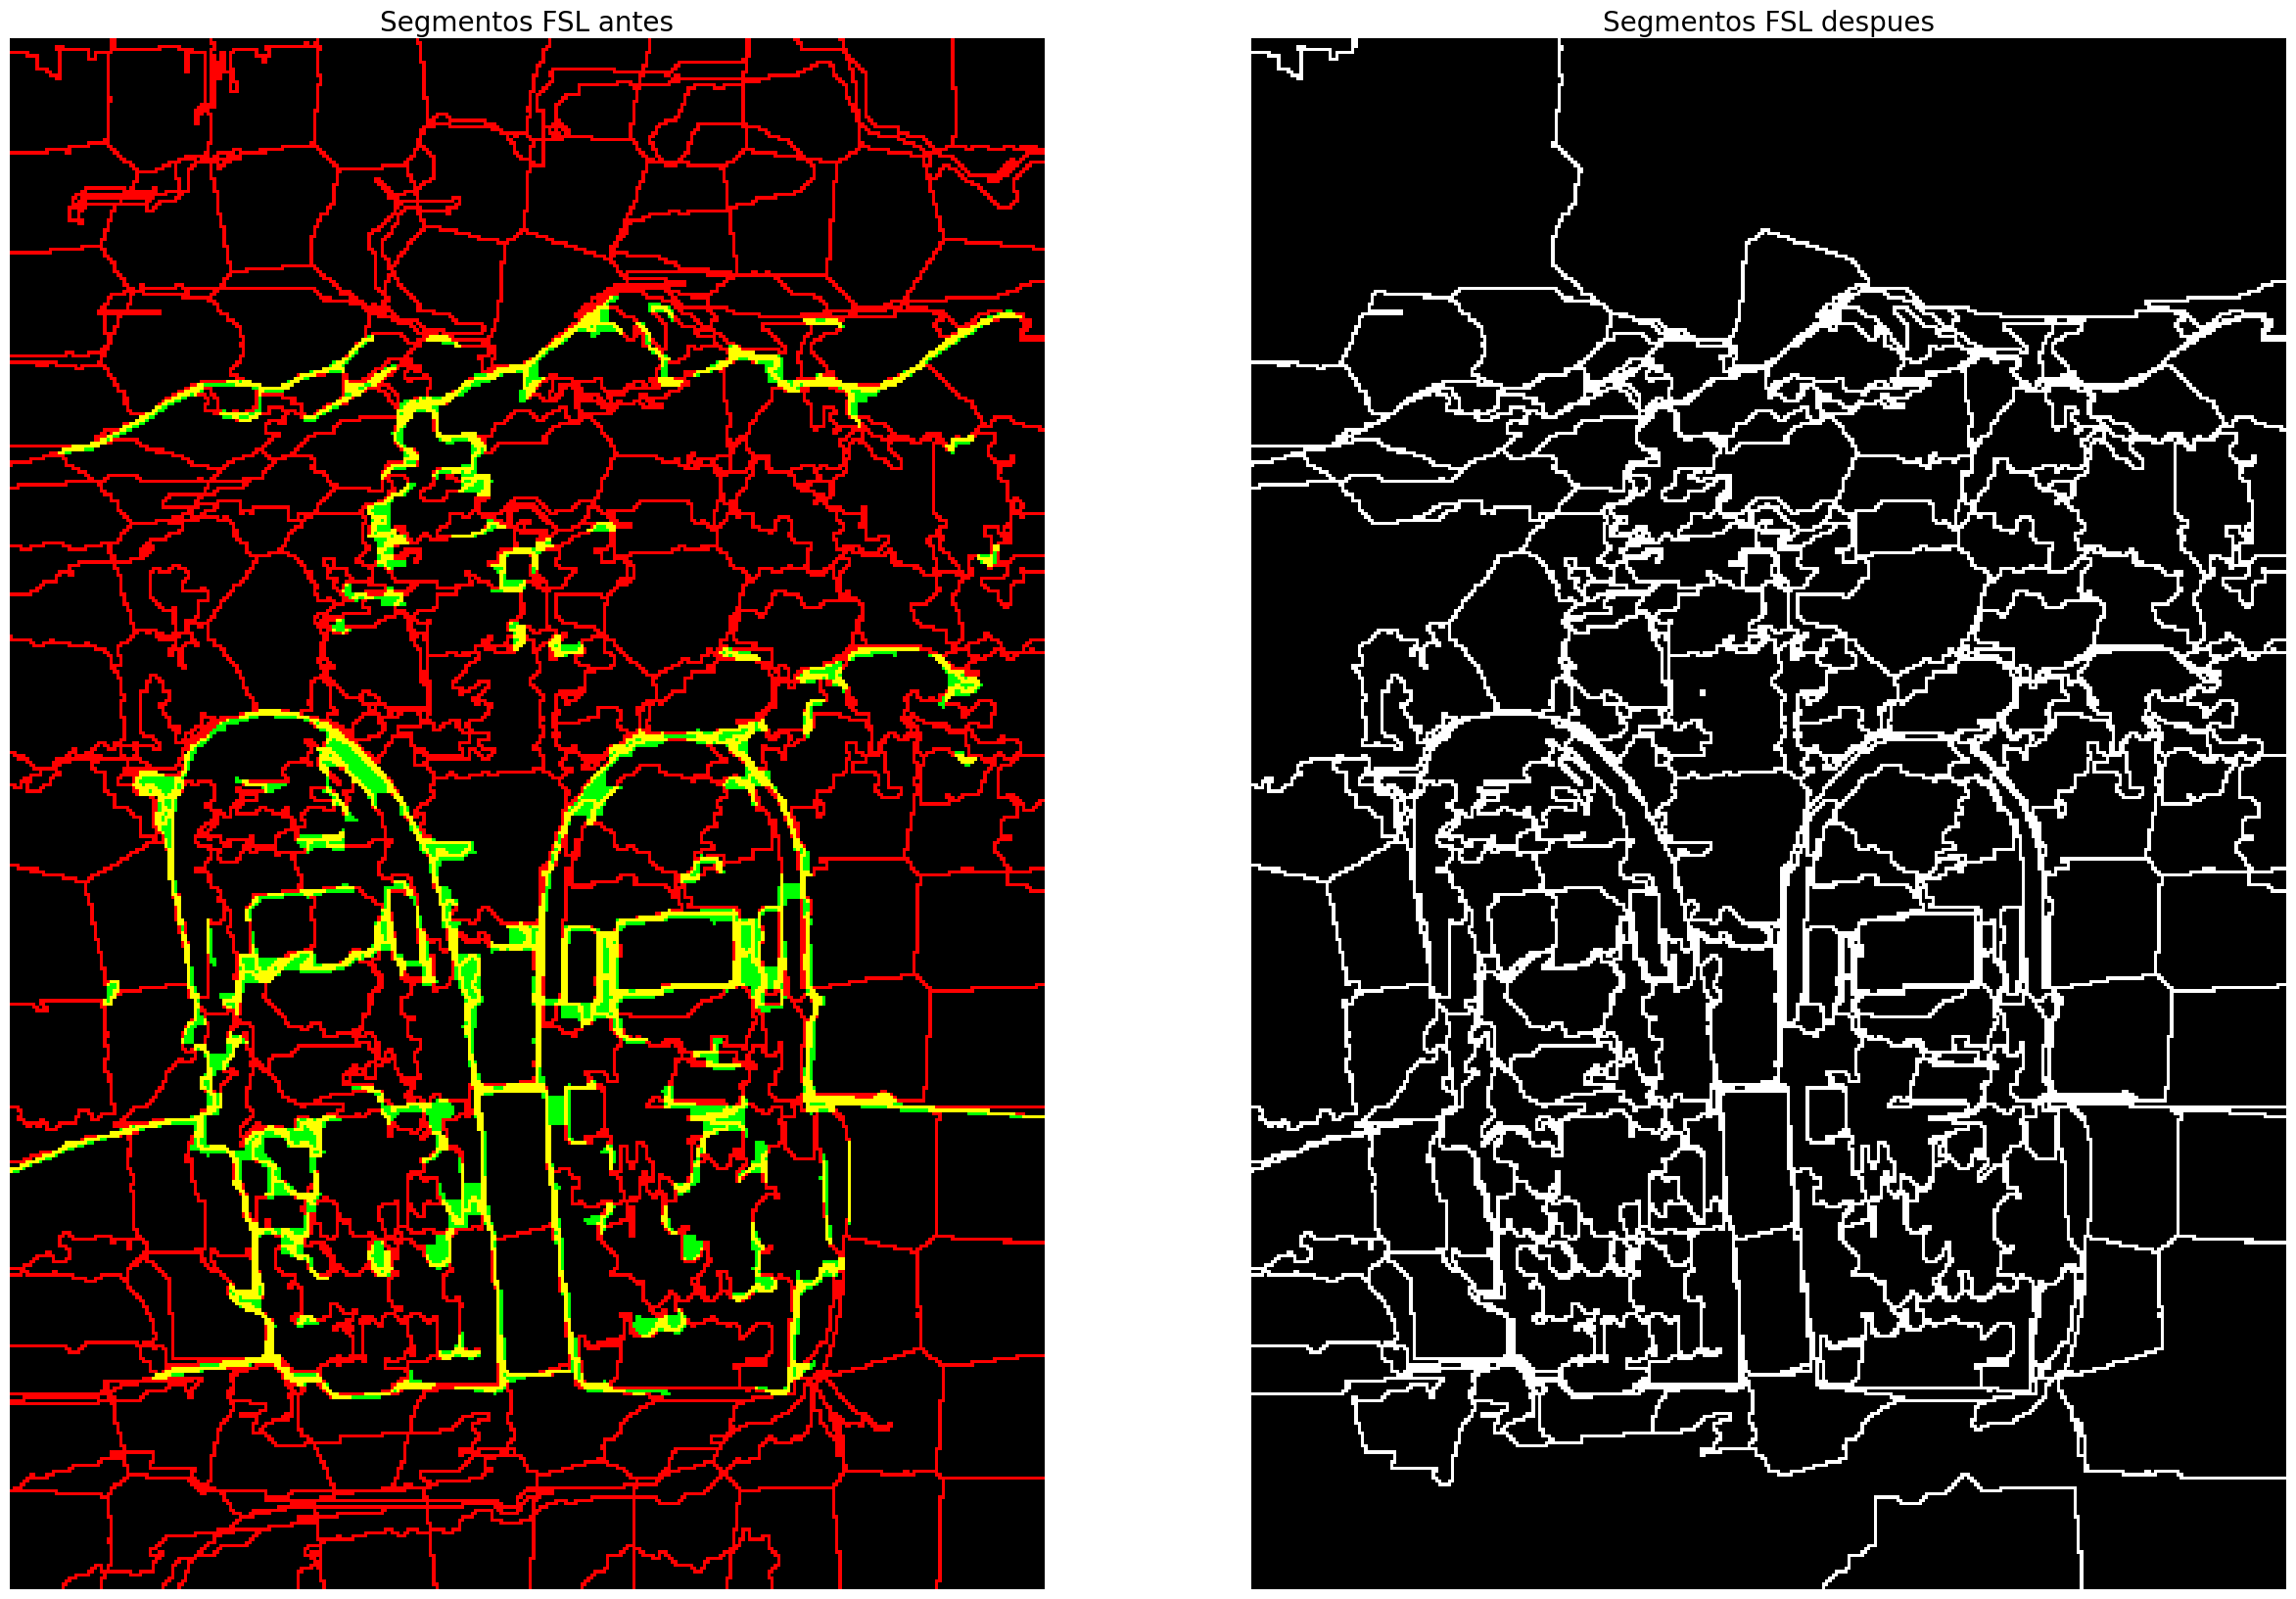

In [19]:
plt.figure(figsize=(30, 30))
plt.subplot(1, 2, 1)
plt.title('Segmentos FSL antes',fontsize=20)
plt.imshow(visual_FSL)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmentos FSL despues',fontsize=20)
plt.imshow(bordes_FSL_bordes, cmap="grey")
plt.axis('off')

In [20]:
#convertir para poder grabar
bordes_foto=np.copy(imagen_org)


bordes_foto[:,:,0]=n_bordes_FSL*255
bordes_foto[:,:,1]=n_bordes_FSL*255
bordes_foto[:,:,2]=n_bordes_FSL*255



#guardado de imagenes para memoria

memoria="imagenes_memoria"
io.imsave(os.path.join(memoria,"Init3_FSL"+ foto+".jpg"), bordes_foto)


In [21]:
#no estan ordenados los segmentos los ordeno para poder seguir trabajando
segments_FSL_bordes=reordenar(segments_FSL_bordes)

# print("segmentos: ",np.max(segments_FSL_bordes), "numero: ",len(np.unique(segments_FSL_bordes)))

#calculo de nuevo las distancias
car_FSL,_=caractHSV3(segments_FSL_bordes,imagen_org)

#elimino los pequeños
segments_FSL_bordes2=quita_pequenos(imagen_org,segments_FSL_bordes,car_FSL,porcentaje)
bordes_FSL_bordes2=genera_bordes(segments_FSL_bordes2)
# print("Superpixeles originales: ",len(np.unique(segments_FSL_bordes)),"Superpixeles ahora: ",len(np.unique(segments_FSL_bordes2)))

D:\Users\Roberto\Anaconda\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Users\Roberto\Anaconda\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
D:\Users\Roberto\Anaconda\Lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\Users\Roberto\Anaconda\Lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
D:\Users\Roberto\Anaconda\Lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


segmentos:  [   1    2    3 ... 1089 1090 1091]
Superpixeles originales:  1091 Superpixeles ahora:  200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 320.5, 480.5, -0.5)

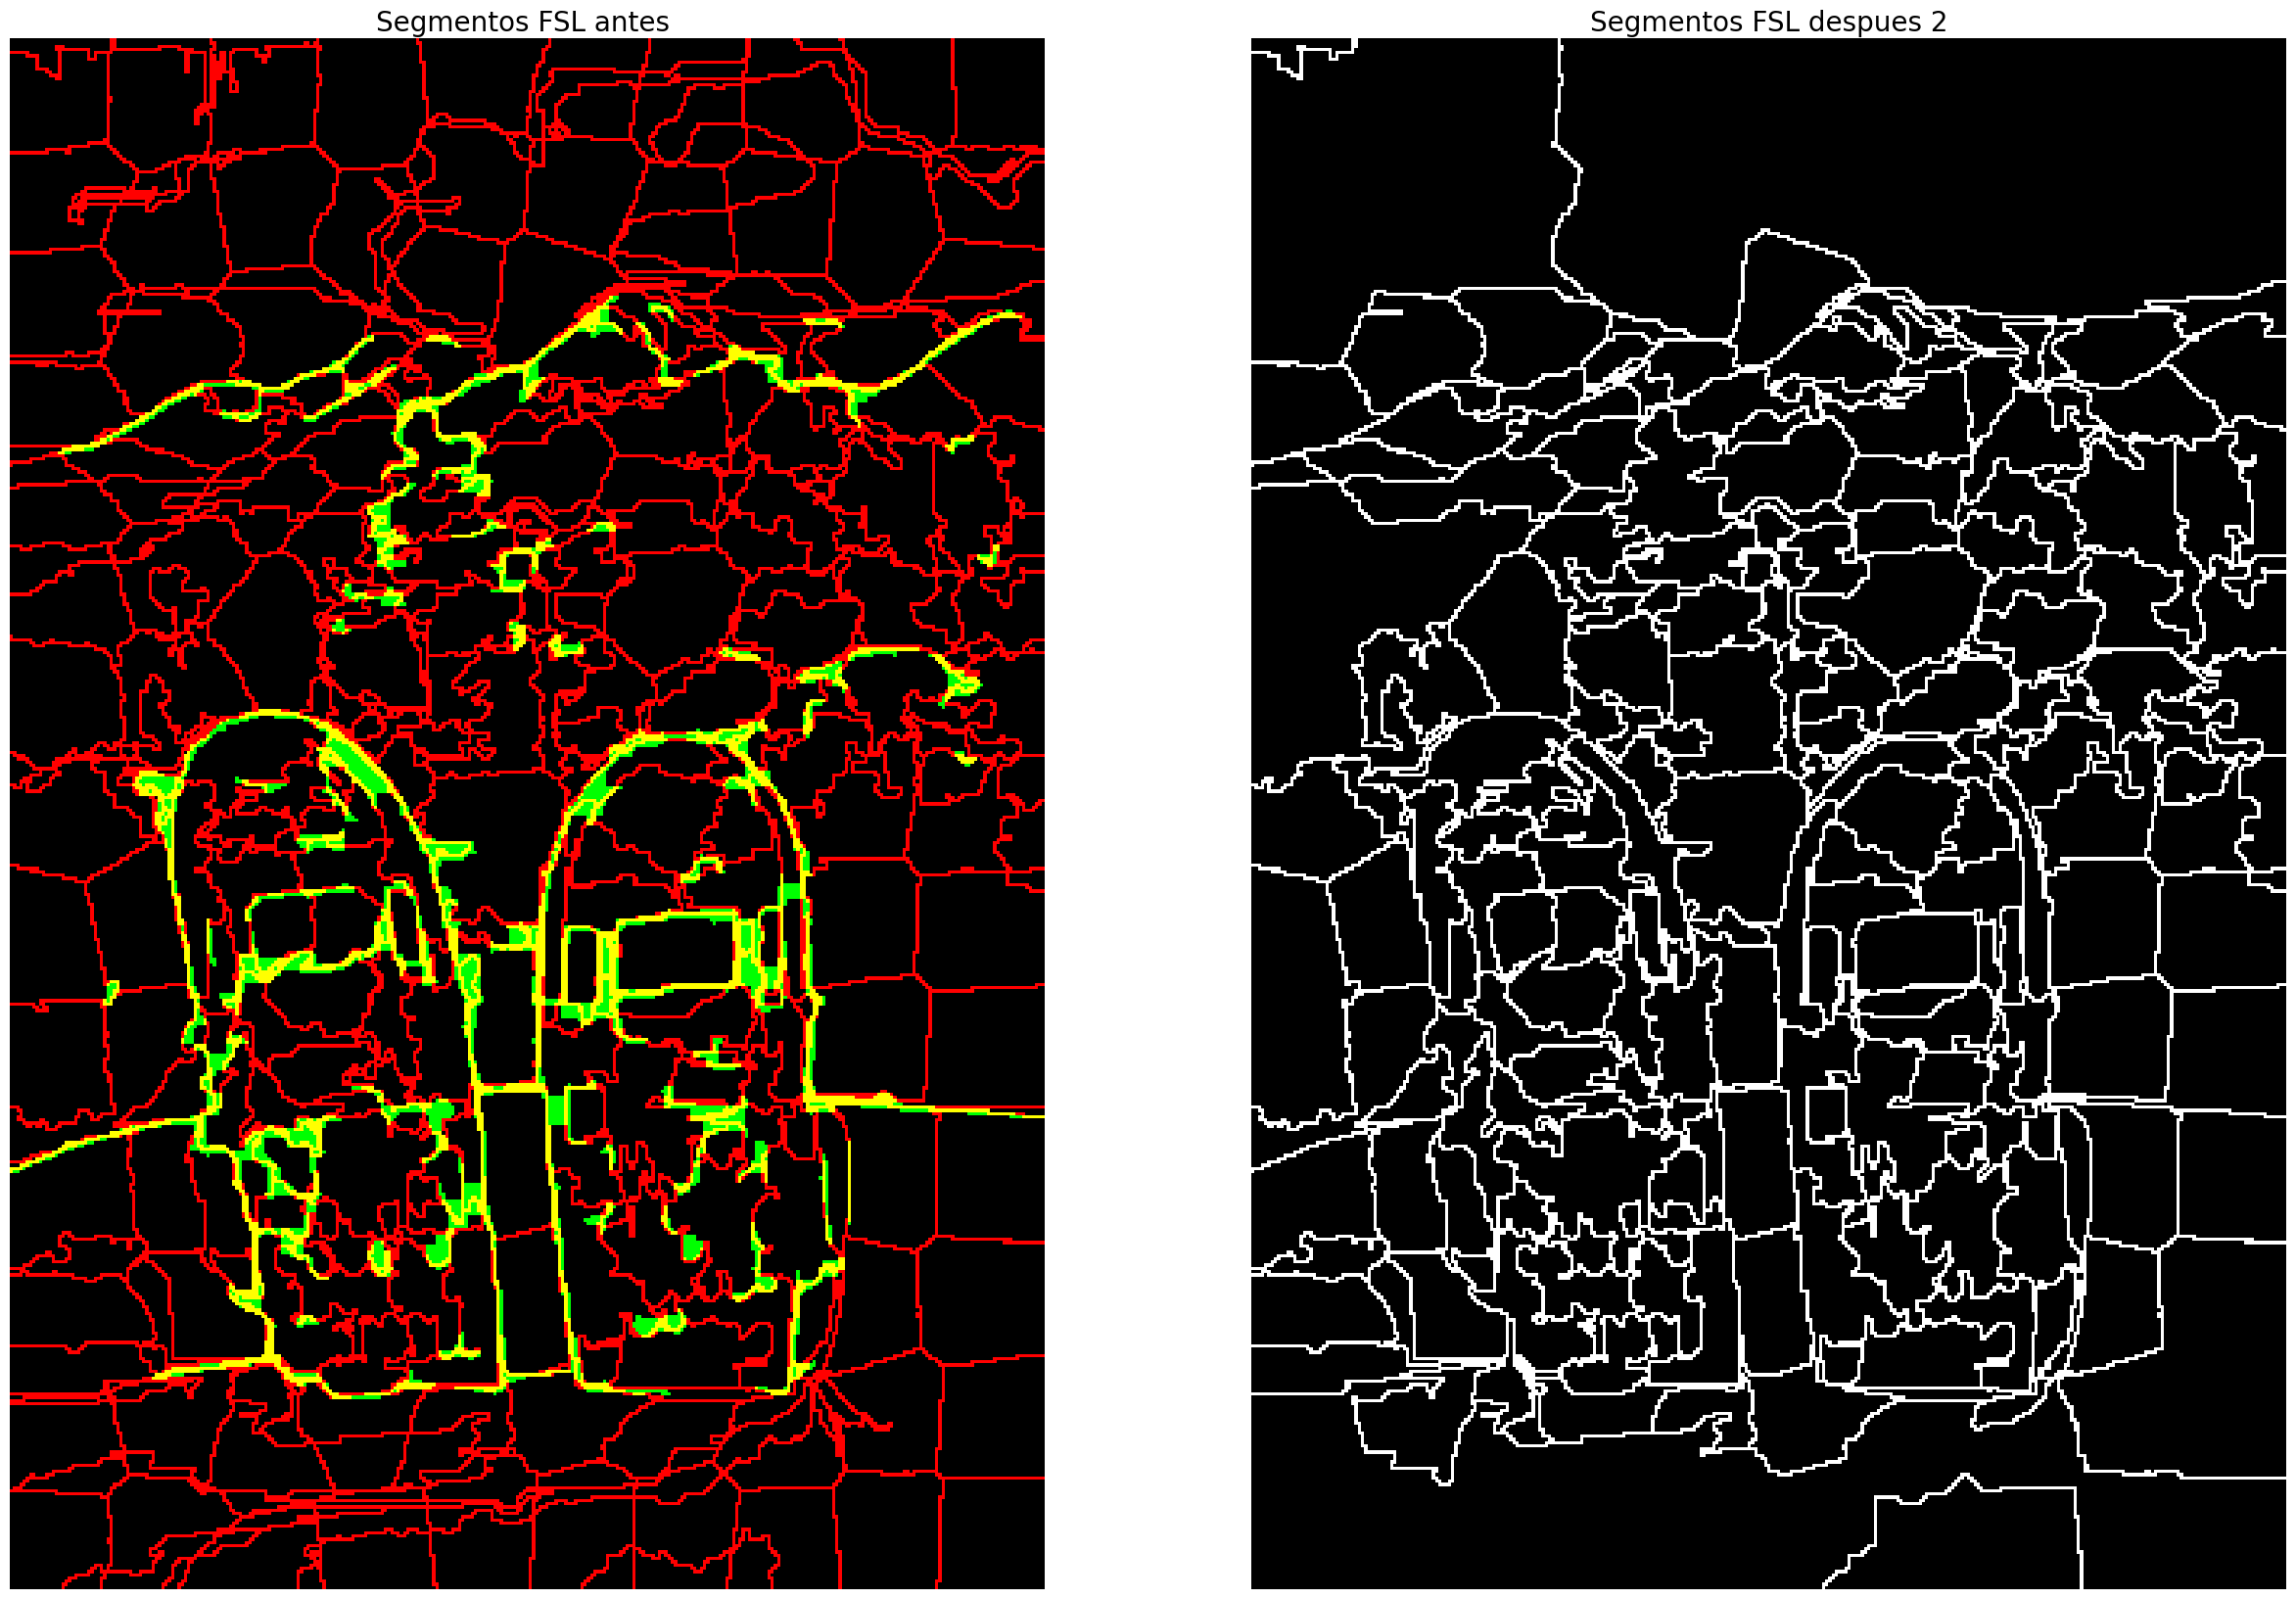

In [22]:
#para visualizar que hacemos bien las cosas

visual_FSL2=np.zeros((image.shape))
visual_FSL2[:,:,0]=bordes_FSL_bordes
visual_FSL2[:,:,1]=bordes_mejorados*255

plt.figure(figsize=(30, 30))
plt.subplot(1, 2, 1)
plt.title('Segmentos FSL antes ',fontsize=20)
plt.imshow(visual_FSL)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmentos FSL despues 2',fontsize=20)
plt.imshow(bordes_FSL_bordes2, cmap="grey")
plt.axis('off')

In [23]:
#convertir para poder grabar
bordes_foto=np.copy(imagen_org)


bordes_foto[:,:,0]=bordes_FSL_bordes2*255
bordes_foto[:,:,1]=bordes_FSL_bordes2*255
bordes_foto[:,:,2]=bordes_FSL_bordes2*255



#guardado de imagenes para memoria

memoria="imagenes_memoria"
io.imsave(os.path.join(memoria,"FSL_HV3_"+ foto+".jpg"), bordes_foto)

### Nueva segmentacion FSE corregida con bordes

In [24]:
segments_FSE_bordes=uso_bordes(n_segments_FSE,bordes_mejorados,car_FSE,clusters_FSE)
bordes_FSE_bordes=genera_bordes(segments_FSE_bordes)

In [25]:
#para visualizar que hacemos bien las cosas

# visual_FSE=np.zeros((image.shape))
# visual_FSE[:,:,0]=n_bordes_FSE
# visual_FSE[:,:,1]=bordes_mejorados*255

In [26]:
# plt.figure(figsize=(30, 30))
# plt.subplot(1, 2, 1)
# plt.title('Segmentos FSE antes',fontsize=20)
# plt.imshow(visual_FSE)
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.title('Segmentos FSE despues',fontsize=20)
# plt.imshow(bordes_FSE_bordes, cmap="grey")
# plt.axis('off')

In [27]:
#no estan ordenados los segmentos los ordeno para poder seguir trabajando
segments_FSE_bordes=reordenar(segments_FSE_bordes)

print("segmentos: ",np.max(segments_FSE_bordes), "numero: ",len(np.unique(segments_FSE_bordes)))

#calculo de nuevo las distancias
car_FSE,_=caractHSV3(segments_FSE_bordes,imagen_org)

#elimino los pequeños
segments_FSE_bordes2=quita_pequenos(imagen_org,segments_FSE_bordes,car_FSE,porcentaje)
bordes_FSE_bordes2=genera_bordes(segments_FSE_bordes2)
# print("Superpixeles originales: ",len(np.unique(segments_FSE_bordes)),"Superpixeles ahora: ",len(np.unique(segments_FSE_bordes2)))

segmentos:  1179 numero:  1179


D:\Users\Roberto\Anaconda\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Users\Roberto\Anaconda\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
D:\Users\Roberto\Anaconda\Lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\Users\Roberto\Anaconda\Lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
D:\Users\Roberto\Anaconda\Lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


segmentos:  [   1    2    3 ... 1177 1178 1179]
Superpixeles originales:  1179 Superpixeles ahora:  224


In [28]:
#para visualizar que hacemos bien las cosas

# visual_FSE2=np.zeros((image.shape))
# visual_FSE2[:,:,0]=bordes_FSE_bordes
# visual_FSE2[:,:,1]=bordes_mejorados*255

# plt.figure(figsize=(30, 30))
# plt.subplot(1, 2, 1)
# plt.title('Segmentos FSE antes ',fontsize=20)
# plt.imshow(visual_FSE2)
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.title('Segmentos FSE despues 2',fontsize=20)
# plt.imshow(bordes_FSE_bordes2, cmap="grey")
# plt.axis('off')

### Nueva segmentacion FQ corregida con bordes

In [29]:
np.max(n_segments_FQ)

1752

In [30]:
np.unique(n_segments_FQ)

array([   0,    1,    2, ..., 1750, 1751, 1752])

In [31]:
car_FQ.shape

(1753, 2)

In [32]:
segments_FQ_bordes=uso_bordes(n_segments_FQ,bordes_mejorados,car_FQ,clusters_FQ)
bordes_FQ_bordes=genera_bordes(segments_FQ_bordes)

In [33]:
#para visualizar que hacemos bien las cosas

# visual_FQ=np.zeros((image.shape))
# visual_FQ[:,:,0]=n_bordes_FQ
# visual_FQ[:,:,1]=bordes_mejorados*255

In [34]:
# plt.figure(figsize=(30, 30))
# plt.subplot(1, 2, 1)
# plt.title('Segmentos FQ antes',fontsize=20)
# plt.imshow(visual_FQ)
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.title('Segmentos FQ despues',fontsize=20)
# plt.imshow(bordes_FQ_bordes, cmap="grey")
# plt.axis('off')

In [35]:
#no estan ordenados los segmentos los ordeno para poder seguir trabajando
segments_FQ_bordes=reordenar(segments_FQ_bordes)

# print("segmentos: ",np.max(segments_FQ_bordes), "numero: ",len(np.unique(segments_FQ_bordes)))

#calculo de nuevo las distancias
car_FQ,_=caractHSV3(segments_FQ_bordes,imagen_org)

#elimino los pequeños
segments_FQ_bordes2=quita_pequenos(imagen_org,segments_FQ_bordes,car_FQ,porcentaje)
bordes_FQ_bordes2=genera_bordes(segments_FQ_bordes2)
print("Superpixeles originales: ",len(np.unique(segments_FQ_bordes)),"Superpixeles ahora: ",len(np.unique(segments_FQ_bordes2)))

segmentos:  1454 numero:  1454


D:\Users\Roberto\Anaconda\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Users\Roberto\Anaconda\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
D:\Users\Roberto\Anaconda\Lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\Users\Roberto\Anaconda\Lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
D:\Users\Roberto\Anaconda\Lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


segmentos:  [   1    2    3 ... 1452 1453 1454]
Superpixeles originales:  1454 Superpixeles ahora:  197


In [36]:
#para visualizar que hacemos bien las cosas

# visual_FQ2=np.zeros((image.shape))
# visual_FQ2[:,:,0]=bordes_FQ_bordes
# visual_FQ2[:,:,1]=bordes_mejorados*255

# plt.figure(figsize=(30, 30))
# plt.subplot(1, 2, 1)
# plt.title('Segmentos FQ antes ',fontsize=20)
# plt.imshow(visual_FQ2)
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.title('Segmentos FQ despues 2',fontsize=20)
# plt.imshow(bordes_FQ_bordes2, cmap="grey")
# plt.axis('off')

### Nueva segmentacion union corregida con bordes


In [37]:
# print(np.unique(segmentacion_mejorada),len(np.unique(segmentacion_mejorada)))

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209] 209


In [38]:
n_segments_bordes=uso_bordes(n_segments,bordes_mejorados,car_union,clusters_union) #original
#n_segments_bordes=uso_bordes(segmentacion_mejoradav2,bordes_mejorados,car_union)
bordes_union_bordes=genera_bordes(n_segments_bordes)

In [39]:
#para visualizar que hacemos bien las cosas

visual_union=np.zeros((image.shape))
visual_union[:,:,0]=n_bordes
visual_union[:,:,1]=bordes_mejorados*255

In [40]:
# plt.figure(figsize=(30, 30))
# plt.subplot(1, 2, 1)
# plt.title('Segmentos Todos antes',fontsize=20)
# plt.imshow(visual_union)
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.title('Segmentos Todos despues',fontsize=20)
# plt.imshow(bordes_union_bordes, cmap="grey")
# plt.axis('off')

In [41]:
# print("nº mayor segmentos: ",np.max(n_segments_bordes), "numero: ",len(np.unique(n_segments_bordes)))

nº mayor segmentos:  4895 numero:  2886


In [42]:
#no estan ordenados los segmentos los ordeno para poder seguir trabajando
n_segments_bordes=reordenar(n_segments_bordes)
# print("segmentos: ",np.max(n_segments_bordes), "numero: ",len(np.unique(n_segments_bordes)))

segmentos:  2886 numero:  2886


In [43]:
#calculo de nuevo las distancias
car_union,_=caractHSV3(n_segments_bordes,imagen_org)

D:\Users\Roberto\Anaconda\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Users\Roberto\Anaconda\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
D:\Users\Roberto\Anaconda\Lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\Users\Roberto\Anaconda\Lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
D:\Users\Roberto\Anaconda\Lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [44]:
#elimino los pequeños
n_segments_bordes2=quita_pequenos(imagen_org,n_segments_bordes,car_union,porcentaje)
bordes_union_bordes2=genera_bordes(n_segments_bordes2)
# print("Superpixeles originales: ",len(np.unique(n_segments_bordes)),"Superpixeles ahora: ",len(np.unique(n_segments_bordes2)))

segmentos:  [   1    2    3 ... 2884 2885 2886]
Superpixeles originales:  2886 Superpixeles ahora:  259


In [45]:
# n_segments_bordes2

array([[  58,   58,   58, ...,   58,   58,   58],
       [  58,   58,   58, ...,   58,   58,   58],
       [  58,   58,   58, ...,   58,   58,   58],
       ...,
       [2870, 2870, 2870, ..., 2870, 2870, 2870],
       [2870, 2870, 2870, ..., 2870, 2870, 2870],
       [2870, 2870, 2870, ..., 2870, 2870, 2870]])

In [46]:
#para visualizar que hacemos bien las cosas

visual_union2=np.zeros((image.shape))
visual_union2[:,:,0]=bordes_union_bordes
visual_union2[:,:,1]=bordes_mejorados*255

In [47]:
# plt.figure(figsize=(30, 30))
# plt.subplot(1, 2, 1)
# plt.title('Segmentos todos antes ',fontsize=20)
# plt.imshow(visual_union2)
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.title('Segmentos todos despues 2',fontsize=20)
# plt.imshow(bordes_union_bordes2, cmap="grey")
# plt.axis('off')

In [48]:
#reordeno todas las segmentaciones para no generar "huecos"
n_segments_bordes2=reordenar(n_segments_bordes2)
segments_FSL_bordes2=reordenar(segments_FSL_bordes2)
segments_FSE_bordes2=reordenar(segments_FSE_bordes2)
segments_FQ_bordes2=reordenar(segments_FQ_bordes2)


In [49]:
#Leo la imagen
directorio="compartir"

bordes_image_G_S=np.load(os.path.join(directorio,"bordes_image_G_S.npy"))



## RESULTADOS

In [50]:
print("Datos FSL")
r_FSL,p_FSL=test_BR(bordes_FSL_bordes2,bordes_image_G_S)
print("segmentos:",np.max(segments_FSL_bordes2))
asa_FSL=ASA(segments_FSL_bordes2,image_G_S)

# print("Datos FSE")
# test_BR(bordes_FSE_bordes2,bordes_image_G_S)
# print("segmentos:",np.max(segments_FSE_bordes2))
# ASA(segments_FSE_bordes2,image_G_S)

# print("Datos FQ")
# test_BR(bordes_FQ_bordes2,bordes_image_G_S)
# print("segmentos:",np.max(segments_FQ_bordes2))
# ASA(segments_FQ_bordes2,image_G_S)

# print("Datos Todos")
# test_BR(bordes_union_bordes2,bordes_image_G_S)
# print("segmentos:",np.max(n_segments_bordes2))
# ASA(n_segments_bordes2,image_G_S)



Datos FSL
recall: 0.9001
precision: 0.3498
segmentos: 200
aciertos:  145411 total:  154401 ASA: 0.9418


0.9418

In [ ]:
#grabamos los datos por imagen para agregarlos despues.
datos_FSL=np.array([r_FSL,p_FSL,np.max(segments_FSL_bordes2),asa_FSL])

print(datos_FSL)

ruta_datos="info_imagenes_test"
np.savetxt(os.path.join(ruta_datos,"intercambio_fase3_FSL"+".csv"), datos_FSL, delimiter=',')

In [51]:
#para ver como de bien esta la segmentacion
from skimage.color import label2rgb
# segments_visual = label2rgb(n_segments_bordes2+1, imagen_org, kind='avg')
# segments_visual_FSL = label2rgb(segments_FSL_bordes2+1, imagen_org, kind='avg')
# segments_visual_FSE = label2rgb(segments_FSE_bordes2+1, imagen_org, kind='avg')
# segments_visual_FQ = label2rgb(segments_FQ_bordes2+1, imagen_org, kind='avg')

# plt.figure(figsize=(20, 20))
# plt.subplot(2,2,1)
# plt.title('Resultado visual todos')
# plt.imshow(segments_visual)
# plt.axis('off')

# plt.subplot(2,2,2)
# plt.title('Resultado visual FSL')
# plt.imshow(segments_visual_FSL)
# plt.axis('off')

# plt.subplot(2,2,3)
# plt.title('Resultado visual FSE')
# plt.imshow(segments_visual_FSE)
# plt.axis('off')

# plt.subplot(2,2,4)
# plt.title('Resultado visual FQ')
# plt.imshow(segments_visual_FQ)
# plt.axis('off')

In [52]:
#reordenamos los megapixeles para evitar problemas de computacion
n_segments_bordes2=reordenar(n_segments_bordes2)
segments_FSL_bordes2=reordenar(segments_FSL_bordes2)

In [53]:
#guardamos la imagen que esamos usando en intercambio
inter="compartir"
np.save(os.path.join(inter,'n_segments_bordes2'), n_segments_bordes2)
np.save(os.path.join(inter,'bordes_union_bordes2'), bordes_union_bordes2)

np.save(os.path.join(inter,'segments_FSL_bordes2'), segments_FSL_bordes2)
np.save(os.path.join(inter,'bordes_FSL_bordes2'), bordes_FSL_bordes2)

np.save(os.path.join(inter,'segments_FSE_bordes2'), segments_FSE_bordes2)
np.save(os.path.join(inter,'bordes_FSE_bordes2'), bordes_FSE_bordes2)

np.save(os.path.join(inter,'segments_FQ_bordes2'), segments_FQ_bordes2)
np.save(os.path.join(inter,'bordes_FQ_bordes2'), bordes_FQ_bordes2)


np.save(os.path.join(inter,'int_bordes_mod'), int_bordes_mod)

## Test Segmentacion

In [54]:
def test_segmentacion(segmentacion):
    for seg in np.unique(segmentacion):
#         print("elementos:",np.count_nonzero(segmentacion==seg))
        mask=(np.where(segmentacion==seg,255,0)).astype(np.uint8)
#         print(np.unique(mask))
        contornos, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if len(contornos)>1:
            print("segmentacion: ",seg,"cantidad contornos internos: ",len(contornos))
        

In [55]:
# print(np.unique(n_segments_bordes2))
# test_segmentacion(n_segments)